In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers, models

In [2]:
df = pd.read_csv('f1_2024_laps_clean.csv')
df

,race,Driver,Team,LapNumber,lap_time,s1,s2,s3,Compound,TyreLife,Stint,pit_flag,AirTemp,TrackTemp,Rainfall,yellow_flag,sc_flag,vsc_flag,red_flag
0,Bahrain Grand Prix,VER,Red Bull Racing,1.0,97.284,32.402,41.266,23.616,SOFT,4.0,1.0,0,18.3,23.8,False,0,0,0,0
1,Bahrain Grand Prix,LEC,Ferrari,1.0,98.271,33.087,41.549,23.635,SOFT,4.0,1.0,0,18.3,23.8,False,0,0,0,0
2,Bahrain Grand Prix,RUS,Mercedes,1.0,99.228,33.435,42.099,23.694,SOFT,4.0,1.0,0,18.3,23.8,False,0,0,0,0
3,Bahrain Grand Prix,PER,Red Bull Racing,1.0,100.053,33.587,42.610,23.856,SOFT,4.0,1.0,0,18.3,23.8,False,0,0,0,0
4,Bahrain Grand Prix,SAI,Ferrari,1.0,100.620,33.994,42.861,23.765,SOFT,4.0,1.0,0,18.3,23.8,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26376,Abu Dhabi Grand Prix,GAS,Alpine,58.0,90.865,17.995,38.878,33.992,HARD,44.0,2.0,0,25.9,29.3,False,0,0,0,0
26377,Abu Dhabi Grand Prix,HUL,Haas F1 Team,58.0,90.040,18.096,38.630,33.314,HARD,45.0,2.0,0,25.9,29.3,False,0,0,0,0
26378,Abu Dhabi Grand Prix,MAG,Haas F1 Team,57.0,85.637,17.257,37.109,31.271,SOFT,5.0,5.0,0,25.9,29.3,False,0,0,0,0
26379,Abu Dhabi Grand Prix,ALO,Aston Martin,58.0,88.621,17.619,38.418,32.584,HARD,22.0,3.0,0,NaN,NaN,NaN,0,0,0,0


In [7]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26381 entries, 0 to 26380
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   race         26381 non-null  object 
 1   Driver       26381 non-null  object 
 2   Team         26381 non-null  object 
 3   LapNumber    26381 non-null  float64
 4   lap_time     26381 non-null  float64
 5   s1           26363 non-null  float64
 6   s2           26379 non-null  float64
 7   s3           26365 non-null  float64
 8   Compound     26381 non-null  object 
 9   TyreLife     26381 non-null  float64
 10  Stint        26381 non-null  float64
 11  pit_flag     26381 non-null  int64  
 12  AirTemp      19746 non-null  float64
 13  TrackTemp    19746 non-null  float64
 14  Rainfall     19746 non-null  object 
 15  yellow_flag  26381 non-null  int64  
 16  sc_flag      26381 non-null  int64  
 17  vsc_flag     26381 non-null  int64  
 18  red_flag     26381 non-null  int64  
dtypes: f

,count,mean,std,min,25%,50%,75%,max
LapNumber,26381.0,30.595277,18.244037,1.000,15.0000,30.000,45.0000,78.000
lap_time,26381.0,92.727333,60.498621,67.694,81.9640,89.076,98.7040,2526.253
s1,26363.0,28.525921,6.647128,16.897,25.4220,28.513,31.1250,85.037
s2,26379.0,34.977288,7.341801,17.488,29.5625,32.902,41.1455,90.308
s3,26365.0,27.779933,7.098409,17.690,23.0490,25.919,31.3720,91.454
TyreLife,26381.0,15.050946,11.255428,1.000,7.0000,13.000,21.0000,78.000
Stint,26381.0,1.992684,0.872710,1.000,1.0000,2.000,3.0000,5.000
pit_flag,26381.0,0.058375,0.234456,0.000,0.0000,0.000,0.0000,1.000
AirTemp,19746.0,23.474537,4.790150,14.500,19.2000,22.000,28.3000,33.900
TrackTemp,19746.0,35.516348,9.001158,16.700,28.4000,36.700,43.4000,50.700


In [8]:
df.isnull().sum()

race              0
Driver            0
Team              0
LapNumber         0
lap_time          0
s1               18
s2                2
s3               16
Compound          0
TyreLife          0
Stint             0
pit_flag          0
AirTemp        6635
TrackTemp      6635
Rainfall       6635
yellow_flag       0
sc_flag           0
vsc_flag          0
red_flag          0
dtype: int64

In [9]:
# Erase Laps with Missing Sectors
df = df.dropna(subset=["s1", "s2", "s3"])

# Fill missing data with nearest measurements
weather_cols = ["AirTemp", "TrackTemp", "Rainfall"]

df[weather_cols] = df[weather_cols].fillna(method="ffill")
df[weather_cols] = df[weather_cols].fillna(method="bfill")

/tmp/ipykernel_63801/1165729912.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[weather_cols] = df[weather_cols].fillna(method="ffill")
/tmp/ipykernel_63801/1165729912.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[weather_cols] = df[weather_cols].fillna(method="ffill")
/tmp/ipykernel_63801/1165729912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[weather_cols] = df[weather_cols].fillna(method="ffill")
/tmp/ipykernel_

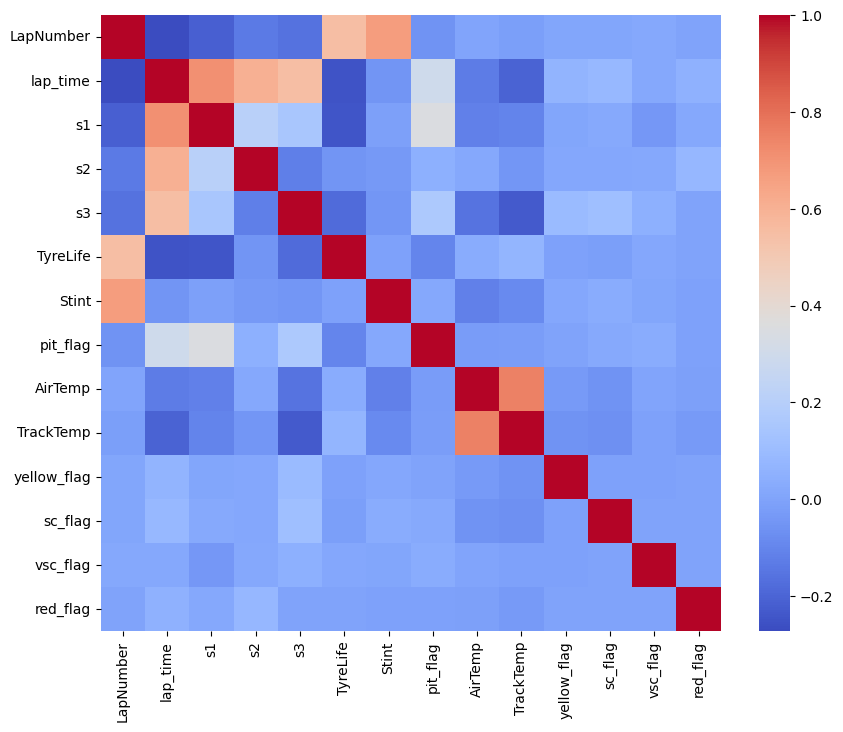

In [13]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.show()

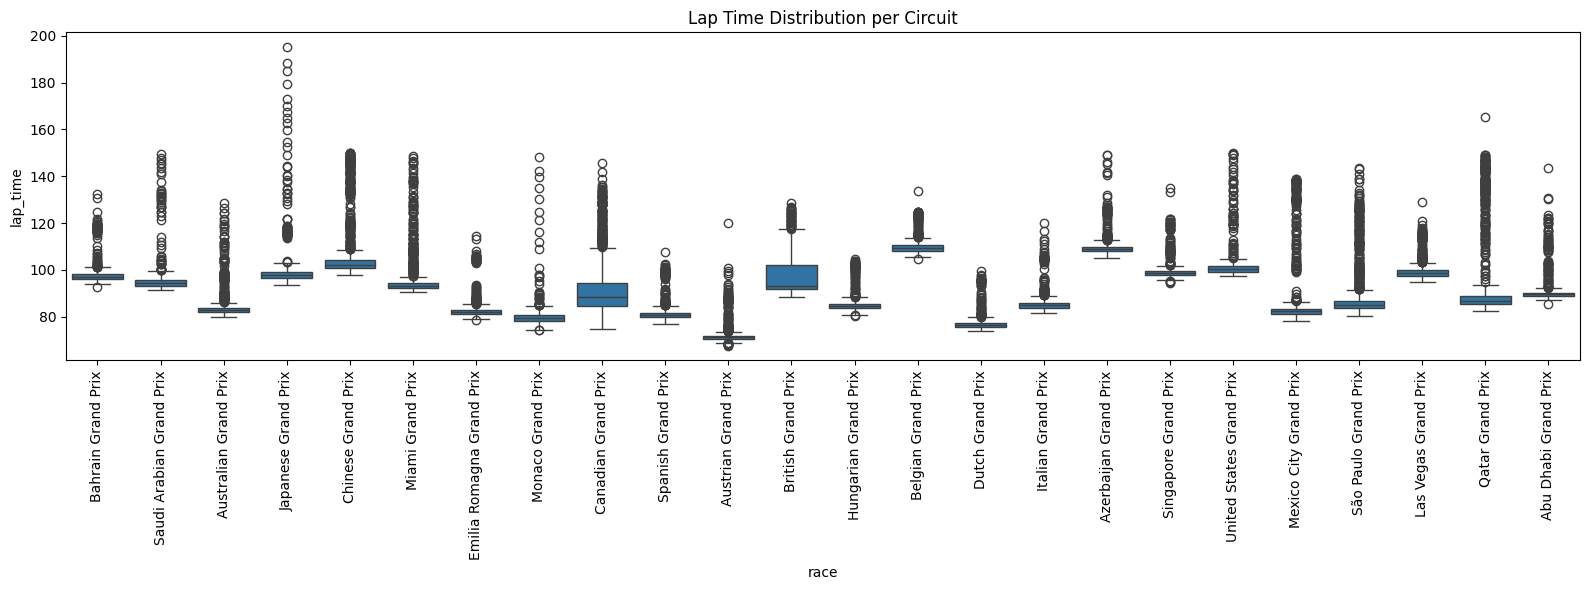

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x="race", y="lap_time")

plt.xticks(rotation=90)
plt.title("Lap Time Distribution per Circuit")
plt.tight_layout()
plt.show()

# Feature Engineering

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
WINDOW_SIZE = 10
BATCH_SIZE = 128
EPOCHS = 50
RANDOM_SEED = 42

# Columns
TARGET_COL = "lap_time"
NUMERIC_COLS = ["LapNumber", "s1", "s2", "s3", "TyreLife", "AirTemp", "TrackTemp", "Rainfall"]
CATEGORICAL_COLS = ["Driver", "Team", "Compound"]  

In [69]:
def train_val_test_race_split(df, seed=RANDOM_SEED):
    races = df["race"].unique()
    rng = np.random.default_rng(seed)
    rng.shuffle(races)
    n = len(races)
    train_end = int(0.8 * n)
    val_end = int(0.9 * n)
    train_r = races[:train_end]
    val_r = races[train_end:val_end]
    test_r = races[val_end:]
    train_df = df[df["race"].isin(train_r)].reset_index(drop=True)
    val_df = df[df["race"].isin(val_r)].reset_index(drop=True)
    test_df = df[df["race"].isin(test_r)].reset_index(drop=True)
    return train_df, val_df, test_df

def build_id_mapping(series):
    """Create mapping from values -> int ids. Reserve 0..(n-1). Unknowns map to n (last index)."""
    uniques = list(pd.Series(series).dropna().unique())
    mapping = {v: i for i, v in enumerate(uniques)}
    unknown_idx = len(uniques)
    return mapping, unknown_idx

def map_with_unknown(series, mapping, unknown_idx):
    return series.map(lambda x: mapping.get(x, unknown_idx)).astype(int)

def make_windows_from_group(gdf, window_size):
    """Given a group DataFrame (single race, driver, stint), sorted by LapNumber,
       produce windows where laps are consecutive. Returns list of (X_num, driver_id, team_id, y)."""
    Xs_num = []
    drv_ids = []
    team_ids = []
    ys = []
    lap_nums = gdf["LapNumber"].values.astype(int)
    # numeric matrix for group
    numeric_mat = gdf[NUMERIC_COLS].values
    n = len(gdf)
    for i in range(n - window_size):
        # ensure consecutive lap numbers
        window_laps = lap_nums[i : i + window_size + 1]  # includes target lap
        if np.max(np.diff(window_laps)) <= 2:
            # ensure no NaNs in numeric window and target
            win_num = numeric_mat[i : i + window_size + 1]
            if np.any(np.isnan(win_num)):
                continue
            Xs_num.append(win_num[:window_size])  # first T rows as input
            ys.append(win_num[-1][NUMERIC_COLS.index(TARGET_COL)] if TARGET_COL in NUMERIC_COLS else gdf[TARGET_COL].values[i + window_size])
            # but target is lap_time column (not in NUMERIC_COLS), so use gdf[TARGET_COL] explicitly:
            ys[-1] = gdf[TARGET_COL].values[i + window_size]
            drv_ids.append(gdf["driver_id"].iloc[0])  # group is single driver
            team_ids.append(gdf["team_id"].iloc[0])
    if len(Xs_num) == 0:
        return None
    return np.stack(Xs_num), np.array(drv_ids), np.array(team_ids), np.array(ys)


def create_sequences(df, window_size):
    """Group by (race, driver, Stint) and create windows. Returns arrays."""
    seqs_num = []
    seq_drv = []
    seq_team = []
    seq_y = []
    grouped = df.groupby(["race", "driver_id", "Stint"], sort=False)
    for _, g in grouped:
        g_sorted = g.sort_values("LapNumber").reset_index(drop=True)
        res = make_windows_from_group(g_sorted, window_size)
        if res is None:
            continue
        X_num, drv_ids, team_ids, ys = res
        seqs_num.append(X_num)
        seq_drv.append(drv_ids)
        seq_team.append(team_ids)
        seq_y.append(ys)
    if len(seqs_num) == 0:
        return np.empty((0,window_size,len(NUMERIC_COLS))), np.empty((0,)), np.empty((0,)), np.empty((0,))
    X_num = np.concatenate(seqs_num, axis=0)
    drv_arr = np.concatenate(seq_drv, axis=0)
    team_arr = np.concatenate(seq_team, axis=0)
    y_arr = np.concatenate(seq_y, axis=0)
    return X_num, drv_arr, team_arr, y_arr

In [70]:
# Keep only Green Flag Laps
df_clean = df[
    (df["pit_flag"] == 0) &
    (df["yellow_flag"] == 0) &
    (df["sc_flag"] == 0) &
    (df["vsc_flag"] == 0)
]

# Delete very slow laps
df_clean = df_clean[df_clean["lap_time"] < df_clean["lap_time"].quantile(0.99)]

In [71]:
train_df, val_df, test_df = train_val_test_race_split(df_clean, seed=RANDOM_SEED)

driver_map, driver_unk = build_id_mapping(train_df["Driver"])
team_map, team_unk = build_id_mapping(train_df["Team"])

for dframe in (train_df, val_df, test_df):
    dframe["driver_id"] = map_with_unknown(dframe["Driver"], driver_map, driver_unk)
    dframe["team_id"] = map_with_unknown(dframe["Team"], team_map, team_unk)

In [72]:
scaler = StandardScaler()

train_num_rows = train_df[NUMERIC_COLS].dropna()
scaler.fit(train_num_rows.values)

for dframe in (train_df, val_df, test_df):
    dframe[NUMERIC_COLS] = scaler.transform(dframe[NUMERIC_COLS].fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_63801/1724056303.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dframe[NUMERIC_COLS] = scaler.transform(dframe[NUMERIC_COLS].fillna(method="ffill").fillna(method="bfill"))
/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/tmp/ipykernel_63801/1724056303.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dframe[NUMERIC_COLS] = scaler.transform(dframe[NUMERIC_COLS].fillna(method="ffill").fillna(method="bfill"))
/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warni

In [73]:
X_train_num, Xd_train, Xt_train, y_train = create_sequences(train_df, WINDOW_SIZE)
X_val_num,   Xd_val,   Xt_val,   y_val   = create_sequences(val_df, WINDOW_SIZE)
X_test_num,  Xd_test,  Xt_test,  y_test  = create_sequences(test_df, WINDOW_SIZE)

print("Shapes:")
print("X_train_num:", X_train_num.shape, "driver:", Xd_train.shape, "team:", Xt_train.shape, "y:", y_train.shape)
print("X_val_num:", X_val_num.shape, "X_test_num:", X_test_num.shape)

Shapes:
X_train_num: (11198, 10, 8) driver: (11198,) team: (11198,) y: (11198,)
X_val_num: (576, 10, 8) X_test_num: (1327, 10, 8)


In [ ]:
# ---------------- Prepare inputs for Keras ----------------
# X_num shape: (n_samples, T, n_numeric)
n_num = X_train_num.shape[-1]

# Build model: numeric sequence input + driver & team embeddings
driver_vocab = max(driver_map.values()) + 1  # number of known drivers in train
team_vocab = max(team_map.values()) + 1

# include unknown index if present
if driver_unk is not None:
    driver_vocab = max(driver_vocab, driver_unk + 1)
if team_unk is not None:
    team_vocab = max(team_vocab, team_unk + 1)


In [ ]:
# # Validation Split 8:1:1
# races = df_clean['race'].unique()
# train_races, temp_races = train_test_split(
#     races, test_size=0.2, random_state=42
# )

# val_races, test_races = train_test_split(
#     temp_races, test_size=0.5, random_state=42
# )

# print("Train races:", len(train_races))
# print("Val races:", len(val_races))
# print("Test races:", len(test_races))

# train_df = df_clean[df_clean['race'].isin(train_races)]
# val_df   = df_clean[df_clean['race'].isin(val_races)]
# test_df  = df_clean[df_clean['race'].isin(test_races)]

Train races: 19
Val races: 2
Test races: 3


In [ ]:
# target = "lap_time"

# X_train = train_df.drop(columns=[target])
# y_train = train_df[target]

# X_val   = val_df.drop(columns=[target])
# y_val   = val_df[target]

# X_test  = test_df.drop(columns=[target])
# y_test  = test_df[target]

# print("Train size:", len(X_train))
# print("Val size:", len(X_val))
# print("Test size:", len(X_test))

Train size: 19291
Val size: 2053
Test size: 2791


In [94]:
WINDOW = 10       # number of laps in your sequence
NUM_FEATURES = 8  # number of numeric features
N_DRIVERS = 21    # update based on your mapping
N_TEAMS = 10      # update based on your mapping

# --- Inputs ---
num_input = layers.Input(shape=(10, 8), name="num_input")   # numerical sequence
driver_input = layers.Input(shape=(), dtype="int32", name="driver_input")
team_input = layers.Input(shape=(), dtype="int32", name="team_input")

# --- Embeddings ---
driver_emb = layers.Embedding(input_dim=N_DRIVERS, output_dim=8)(driver_input)
team_emb = layers.Embedding(input_dim=N_TEAMS, output_dim=4)(team_input)

driver_emb = layers.Flatten()(driver_emb)
team_emb = layers.Flatten()(team_emb)


In [95]:
# --- LSTM branch ---
x = layers.LSTM(128, return_sequences=True)(num_input)
x = layers.LSTM(64)(x)

# --- Combine ---
concat = layers.Concatenate()([x, driver_emb, team_emb])
dense = layers.Dense(32, activation="relu")(concat)
output = layers.Dense(1)(dense)

model = models.Model(
    inputs=[num_input, driver_input, team_input],
    outputs=output
)

model.compile(
    optimizer="adam",
    loss="mae",
    metrics=["mae"]
)

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ num_input           │ (None, 10, 8)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ driver_input        │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ team_input          │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_18 (LSTM)      │ (None, 10, 128)   │     70,144 │ num_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 8)         │        168 │ driver_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 4)         │         40 │ team_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_19 (LSTM)      │ (None, 64)        │     49,408 │ lstm_18[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 8)         │          0 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 4)         │          0 │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 76)        │          0 │ lstm_19[0][0],    │
│ (Concatenate)       │                   │            │ flatten_4[0][0],  │
│                     │                   │            │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 32)        │      2,464 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         33 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 122,257 (477.57 KB)

 Trainable params: 122,257 (477.57 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae",
    patience=6,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    {"num_input": X_train_num, "driver_input": Xd_train, "team_input": Xt_train},
    y_train,
    validation_data=(
        {"num_input": X_val_num, "driver_input": Xd_val, "team_input": Xt_val},
        y_val
    ),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=2
)

Epoch 1/50


2025-11-26 20:59:57.422802: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[95] = 22 is not in [0, 21)
	 [[{{function_node __inference_one_step_on_data_58613}}{{node functional_7_1/embedding_4_1/GatherV2}}]]


InvalidArgumentError: Graph execution error:

Detected at node functional_7_1/embedding_4_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib64/python3.13/asyncio/base_events.py", line 683, in run_forever

  File "/usr/lib64/python3.13/asyncio/base_events.py", line 2050, in _run_once

  File "/usr/lib64/python3.13/asyncio/events.py", line 89, in _run

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel/kernelbase.py", line 519, in dispatch_queue

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel/kernelbase.py", line 508, in process_one

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel/ipkernel.py", line 368, in execute_request

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel/ipkernel.py", line 455, in do_execute

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/ipykernel/zmqshell.py", line 577, in run_cell

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/IPython/core/interactiveshell.py", line 3116, in run_cell

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/IPython/core/interactiveshell.py", line 3171, in _run_cell

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/IPython/core/interactiveshell.py", line 3394, in run_cell_async

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/IPython/core/interactiveshell.py", line 3639, in run_ast_nodes

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/IPython/core/interactiveshell.py", line 3699, in run_code

  File "/tmp/ipykernel_63801/1748745739.py", line 8, in <module>

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 114, in one_step_on_data

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/backend/tensorflow/trainer.py", line 58, in train_step

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/models/functional.py", line 183, in call

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/ops/function.py", line 206, in _run_through_graph

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/models/functional.py", line 644, in call

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/layers/core/embedding.py", line 150, in call

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/ops/numpy.py", line 5795, in take

  File "/home/eatlunches/Documents/Codes/Deep Learning/.venv/lib64/python3.13/site-packages/keras/src/backend/tensorflow/numpy.py", line 2340, in take

indices[95] = 22 is not in [0, 21)
	 [[{{node functional_7_1/embedding_4_1/GatherV2}}]] [Op:__inference_multi_step_on_iterator_58702]

In [77]:
eval_res = model.evaluate(
    {"num_input": X_test_num, "driver_input": Xd_test, "team_input": Xt_test},
    y_test,
    verbose=2
)
print("Test MAE:", eval_res[0])

42/42 - 0s - 10ms/step - loss: 11.6330 - mae: 11.6330
Test MAE: 11.632951736450195


In [ ]:
y_pred = model.predict({"num_input": X_test_num, "driver_input": Xd_test, "team_input": Xt_test}, batch_size=BATCH_SIZE)
rmse = np.sqrt(np.mean((y_pred.reshape(-1) - y_test.reshape(-1))**2))
print("Test RMSE:", rmse)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Test RMSE: 14.75093939830647
